# Analyzing Baseball Payroll Efficiency (1985-2015)

In this analysis, I've taken a look at the relationship between a baseball team's payroll and it's success on the field.  After an initial exploration of the data showed a lack of a strong corellation between payroll and wins, I dug a little deeper to see if there were any hints as to why some teams were able to achieve great success with relatively small payrolls.

### Questions to Explore
- **What is the relationship between baseball team payrolls?**
- **Are there any patterns that can hint at why some teams are able to achieve success without high payroll, while others struggle?**

In [497]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read each dataset into a pandas DataFrame
franchises_list = pd.read_csv('baseballdatabank-master/core/TeamsFranchises.csv')
#batting_stats = pd.read_csv('baseballdatabank-master/core/Batting.csv')
salaries_list = pd.read_csv('baseballdatabank-master/core/Salaries.csv')
fielding_stats = pd.read_csv('baseballdatabank-master/core/Fielding.csv')
teams_list = pd.read_csv('baseballdatabank-master/core/Teams.csv')
   
#print(salaries_list.describe())
#print(salaries_list.head())
#print(teams_list.iloc[0])
#print(batting_stats.head())

## A Little Background
From 1996 to 2000, the New York Yankees won four World Series titles.  They did so while possessing the highest payroll in all of baseball.  This led to many fans remarking that the Yankees were buying their championships. Fans of their rival Boston Red Sox even dubbed them "The Evil Empire".

While a significant chunk of the Yankees' talent was home grown, they did like to make a splash in the free agent market and certainly had an advantage in terms of cash to spend.  But can you really buy a championship?  Is it actually that simple?  How big of an advantage to higher payroll teams have?

We'll analyze these questions below, as well as seeing if we can find any patterns among lower payroll teams who have manages to find success.

In [498]:
# Create a pivot table of payrolls for each team by year
payrolls = pd.pivot_table(salaries_list, values='salary', index='teamID', columns='yearID', aggfunc='sum')
print(payrolls.head().iloc[:, 0])

# Calculate the z-score to get a standardized version of the payrolls
payrolls_standardized = (payrolls - payrolls.mean())/payrolls.std()

teamID
ANA           NaN
ARI           NaN
ATL    14807000.0
BAL    11560712.0
BOS    10897560.0
Name: 1985, dtype: float64


### Data Wrangling Notes
In the creation of the payroll pivot table, the individual player salaries were aggregated by team for each season. This process introduced several "NaN" results, as some teams didn't exist in certain years and other teams changed cities (and thus, their teamID was different). This is to be expected, so no data that was needed for this analysis was missing.  For example, as you can see in the head of the table above, ANA (Anaheim) and ARI (Arizona) do not have values for 1985. This is because Anaheim was known as the California Angels at that time and Arizona did not enter the league until 1998.

Note that a common technique to clean up pivot tables is to drops rows or columns with NaN values.  We don't want to do that in this case, as teams that did not exist some years did exist in others. So the result of our pivot table creation is as clean as we need it to be.

Here are some boxplots representing the spreads in team payrolls:

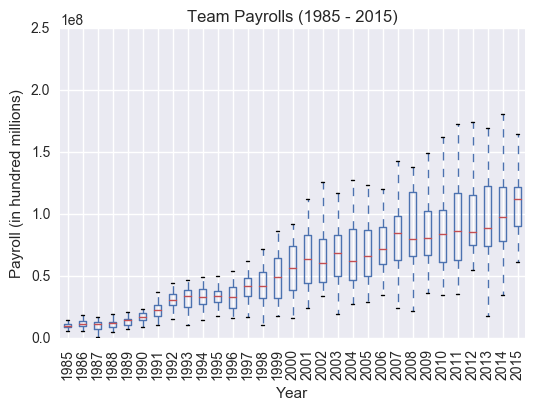

In [499]:
payrolls.plot(kind="box", rot=90)
plt.title('Team Payrolls (1985 - 2015)')
plt.ylabel('Payroll (in hundred millions)')
plt.xlabel('Year')

And here is an adjustment made to standardize each team's payroll by calculating its z-score.  This will give how many standard deviations a team is from the mean in each year, so the boxplots will better represent the spreads representing the "haves" and the "have-nots".

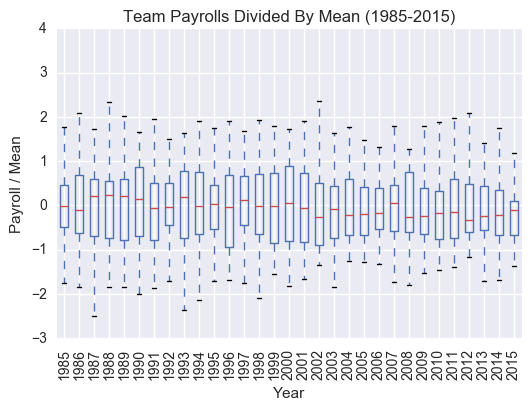

In [500]:
payrolls_standardized.plot(kind="box", rot=90)
plt.title("Team Payrolls Divided By Mean (1985-2015)")
plt.ylabel('Payroll / Mean')
plt.xlabel('Year')

It is interesting to note that there does seem to be an increasing spread (Q1-Q3) in team payrolls coinciding with the beginning of Yankee dominance (1996).  Even so, the whiskers seem fairly consistent over the years. Therefore, it is clear that having one or two teams spending like the Yankees was not unique to the aforementioned championship years.

## Does Higher Payroll Mean More Wins?
We're going to start with a question that is simple enough to answer: "Does having a higher payroll correllate to winning more games?"

To answer this question, we will first look at a single year, 2015, and plot out a graph of payroll vs. wins for each team.  If payroll and wins are indeed correllated, we would expect to see the number of wins for a team increase as payroll increases.  Let's see...  

In [501]:
def get_team_wins_by_year(year):
    '''
    A function to create a data frame filtered by year with teamID as index
    showing the wins for each team that year.
    '''
    #teams_list['payroll'] = 0
    team_wins = teams_list[teams_list['yearID'] == year].set_index('teamID')['W']
    #team_wins = team_wins.loc[:, ['W', 'payroll']]
    return team_wins


In [502]:
def get_team_payrolls_and_wins(year, payrolls):
    '''
    A function that creates a data frame of team payrolls and wins for
    a specified year.
    '''
    teams_list['payroll'] = 0
    #print(payrolls[year])
    teams = teams_list[teams_list['yearID'] == year].set_index('teamID').loc[:, ['W', 'payroll']]
    teams.columns = ['wins', 'payroll']
    teams['payroll'] = payrolls[year]
    #teams['payroll'] = get_team_payrolls(year, salaries_list)['payroll']

    return teams

print(get_team_payrolls_and_wins(2015, payrolls))
print(get_team_payrolls_and_wins(2015, payrolls).describe())

        wins      payroll
teamID                   
KCA       95  112107025.0
MIN       83  107755000.0
CLE       81   87663766.0
CHA       76  112373700.0
DET       74  172284750.0
TOR       93  112992400.0
NYA       87  212751957.0
BAL       81  115044833.0
TBA       80   64521233.0
BOS       78  181103400.0
TEX       88  143742789.0
HOU       86   72256200.0
LAA       85  120005415.0
SEA       76  122208700.0
OAK       68   79053501.0
SLN      100  119241500.0
PIT       98   88892499.0
CHN       97  115879310.0
MIL       68  100850000.0
CIN       64  113072286.0
NYN       90   96766683.0
WAS       83  155587472.0
MIA       71   68056500.0
ATL       67   71781250.0
PHI       63  111693000.0
LAN       92  215792000.0
SFN       84  164701500.0
ARI       79   61834000.0
SDN       74  118441300.0
COL       68   95688600.0
             wins       payroll
count   30.000000  3.000000e+01
mean    80.966667  1.171381e+08
std     10.453455  4.037167e+07
min     63.000000  6.183400e+07
25%     

In [503]:
def correlate_payrolls_and_wins(year, payrolls):
    '''
    A function that returns the correlation between
    a team payrolls and wins in a given year.
    '''
    data = get_team_payrolls_and_wins(year, payrolls)
    return data['wins'].corr(data['payroll'])

print(correlate_payrolls_and_wins(2015, payrolls))

0.238783487589


Correlation: 0.238783487589


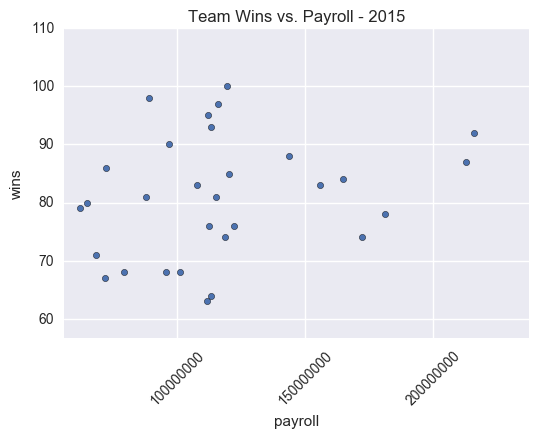

In [504]:
import matplotlib.ticker as plticker

def plot_team_payrolls_and_wins(year, payrolls):
    '''
    Plot the data for team payrolls vs. wins
    '''
    data = get_team_payrolls_and_wins(year, payrolls)
    max_y = data['wins'].max() + .1*data['wins'].max()
    min_y = data['wins'].min() - .1*data['wins'].min()
    max_x = data['payroll'].max() + .1*data['payroll'].max()
    min_x = data['payroll'].min() - .1*data['payroll'].min()

    f = plt.figure()
    plt.ticklabel_format(style = 'plain')
    
    
    title = 'Team Wins vs. Payroll - ' + str(year)
    plt.title(title)
    p = data.plot(kind='scatter', x='payroll',y='wins', ax=f.gca(), rot=45)
    p.set_xlim(min_x, max_x)
    p.set_ylim(min_y, max_y)
    p.get_xaxis().get_major_formatter().set_useOffset(False)
    #sns.lmplot(x='wins',y='payroll',data=data,fit_reg=True) 

plot_team_payrolls_and_wins(2015, payrolls)
print("Correlation: " + str(correlate_payrolls_and_wins(2015, payrolls)))

Well that sure doesn't look very convincing! Note the wide spread in the data points. The most wins belonged to a team (STL) with a payroll that was only slightly above average. And the second most wins, belonged to a team (PIT) with a well below average payroll! In fact, teams 2-4 all had below average payrolls. 

Of course, we can't just go by the picture.  Let's see how payrolls and wins are correlated.  A correlation between variables shows how one variable increases and decreases with another. It is a statistic between -1.0 and 1.0, with 1.0 being a perfect correlation (A and B increase together), -1.0 being a perfect inverse correlation (A increases as B decreases), and 0 being no relationship at all.



In [505]:
print("Correlation: " + str(correlate_payrolls_and_wins(2015, payrolls)))

Correlation: 0.238783487589


Not much of a relationship. Perhaps it was an unusual year. Let's try 2010...

Correlation: 0.368869433157


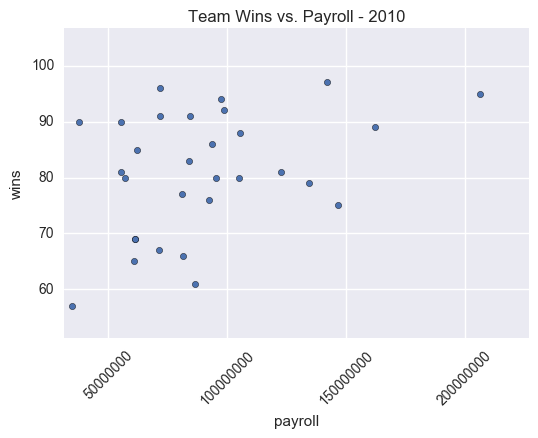

In [506]:
plot_team_payrolls_and_wins(2010, payrolls)
print("Correlation: " + str(correlate_payrolls_and_wins(2010, payrolls)))

Maybe a bit more like we expected, but it certainly doesn't appear to be a strong relationship.

Let's try a few more!

Correlation: 0.49106954664


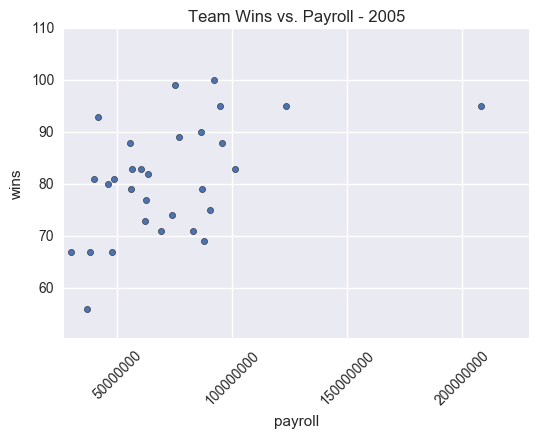

In [507]:
plot_team_payrolls_and_wins(2005, payrolls)
print("Correlation: " + str(correlate_payrolls_and_wins(2005, payrolls)))

Correlation: 0.331089731766


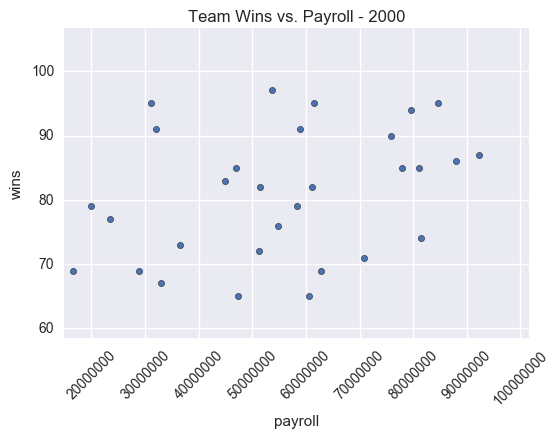

In [508]:
plot_team_payrolls_and_wins(2000, payrolls)
print("Correlation: " + str(correlate_payrolls_and_wins(2000, payrolls)))

Correlation: 0.3266298284


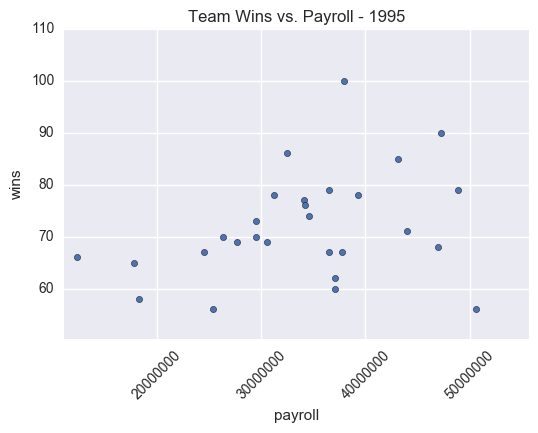

In [509]:
plot_team_payrolls_and_wins(1995, payrolls)
print("Correlation: " + str(correlate_payrolls_and_wins(1995, payrolls)))

While the general trend seems to indicate that more of the high payroll teams tend to have more wins, we'll need to dive into the statistics to get a better understanding of this relationship.

At this point, I think it's best to temper our expectations for a strong correlation and instead anticipate the statistical tests revealing a weak relationship between team payroll and wins. 

All of this leads to a question that I'm excited to explore: 

### **In what ways are some teams mismanaging their spending, while other teams are getting the most bang for their buck?** ###

In [510]:
# A function to get standardized ratios of wins to payroll

def get_wins_payroll_efficiency_list(year, payrolls, bottom=False):
    '''
    Build a list of payroll efficiency for a given year
    '''
    list = get_team_payrolls_and_wins(year, payrolls)
    # Get standardized values
    list_norm = (list - list.min()) / (list.max() - list.min())
    # Add one to numerator and denominator to eliminate zeroes
    list['efficiency'] = (abs(list_norm['wins']) + 1) / (abs(list_norm['payroll']) + 1)
    return list.sort_values('efficiency', ascending=bottom)

Below, I've created a table that is sorted by a standardized ratio of wins/payroll, which I term "efficiency". It shows what teams got the most bang for their buck in a given year (in this case, 2015).  This is a good starting point to see if we can find some commonalities among the efficient spenders and inefficient spenders. 

In [511]:
print(get_wins_payroll_efficiency_list(2015, payrolls))

        wins      payroll  efficiency
teamID                               
PIT       98   88892499.0    1.655064
HOU       86   72256200.0    1.518806
SLN      100  119241500.0    1.456794
TBA       80   64521233.0    1.434423
ARI       79   61834000.0    1.432432
CHN       97  115879310.0    1.420328
NYN       90   96766683.0    1.409840
KCA       95  112107025.0    1.405814
TOR       93  112992400.0    1.359174
CLE       81   87663766.0    1.272926
MIN       83  107755000.0    1.186611
MIA       71   68056500.0    1.168970
LAA       85  120005415.0    1.157315
BAL       81  115044833.0    1.104686
TEX       88  143742789.0    1.093769
ATL       67   71781250.0    1.040858
OAK       68   79053501.0    1.020947
CHA       76  112373700.0    1.017377
SEA       76  122208700.0    0.970693
WAS       83  155587472.0    0.957479
SDN       74  118441300.0    0.948539
SFN       84  164701500.0    0.939703
COL       68   95688600.0    0.930519
MIL       68  100850000.0    0.905630
LAN       92

In [512]:
# Set up data frame for desired years and columns (stats)
teams = teams_list.set_index(['yearID', 'teamID']).loc[1985:, ['W', 'payroll', 'R', 'HR', '2B', '3B', 'SB', 'BB', 'E', 'ERA']]

# Add the payrolls to the teams data frame
teams['payroll'] = payrolls.unstack()

# Apply normalization to each year for wins and payroll
def normed(x):
    x[['W_Norm', 'payroll_norm']] = (x[x.columns[2:4]] - x[x.columns[2:4]].min()) / (x[x.columns[2:4]].max() - x[x.columns[2:4]].min())
    return x
teams_norm = teams.reset_index().groupby(['yearID'], as_index=False).apply(normed)

# Add one to numerator and denominator to eliminate zeroes
teams_norm = pd.DataFrame(teams_norm.set_index(['yearID', 'teamID']))
teams_norm_eff = ((abs(teams_norm['W_Norm']) + 1) / (abs(teams_norm['payroll_norm']) + 1))

# Add 'efficiency' to teams Data Frame
teams['efficiency'] = teams_norm_eff

# Get each stat's correlation with payroll efficiency for every year
efficiency_corr = teams.reset_index().groupby(['yearID'], as_index=False).apply(lambda x: (x[x.columns[4:]]).corr()['efficiency'])
efficiency_corr.index = range(1985, 2016)
efficiency_corr.columns.name = None
efficiency_corr.index.name = 'Year'

Below we show a breakdown of all team stats correlated with payroll efficiency in an effort to find a link.

In [513]:
print('Team Stats Correlated with Payroll Efficiency')
print(efficiency_corr.iloc[:,0:-1])

Team Stats Correlated with Payroll Efficiency
             R        HR        2B        3B        SB        BB         E  \
Year                                                                         
1985  0.348709  0.226611  0.537431  0.471055  0.229741 -0.032283 -0.388152   
1986  0.427434  0.083370  0.104998  0.458449  0.115780  0.049897 -0.080831   
1987  0.570802  0.106608  0.550050  0.458680  0.232762  0.040527  0.029667   
1988  0.328120  0.171583  0.106978  0.224918  0.200464  0.179441 -0.299063   
1989  0.372090  0.211418 -0.025688  0.398436  0.114978 -0.149720 -0.217068   
1990  0.169064 -0.026732  0.051808  0.177201  0.029049  0.195243 -0.384968   
1991  0.337858  0.014244  0.169482  0.460034  0.373919  0.290754  0.015973   
1992  0.380515  0.144124  0.132976  0.372258  0.342959  0.048698 -0.408673   
1993  0.399969 -0.044786  0.223611  0.404799  0.421123  0.168781  0.233420   
1994  0.219803 -0.077007  0.467686  0.169929  0.486158 -0.088082  0.154936   
1995  0.334293  0.

And here is this data represented as a heatmap. Note the strong blue colors that are especially apparent in more recent years.

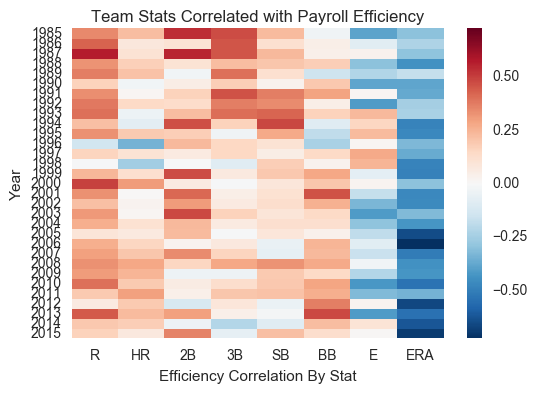

In [514]:
# Create a heatmap for the efficiency correlation with team stats
sns.heatmap(efficiency_corr.iloc[:,0:-1])
plt.title('Team Stats Correlated with Payroll Efficiency')
plt.xlabel('Efficiency Correlation By Stat')

### Interesting Correlation Summary Statistics
Here are some interesting statistics summarizing the correlation between payroll efficiency and team stats from 1985-2015:

In [515]:
print('Mean Efficiency Correlation By Team Stat\n' + str(efficiency_corr.mean()))

Mean Efficiency Correlation By Team Stat
R             0.275449
HR            0.103702
2B            0.196627
3B            0.156421
SB            0.156568
BB            0.148884
E            -0.113573
ERA          -0.431862
efficiency    1.000000
dtype: float64


Of note here is that the only stat that seems somewhat correlated to payroll efficiency is ERA (Earned Run Average). It is negatively correlated, which corresponds to lower ERA's (a low ERA means pitcher's give up fewer earned runs per inning pitched) correlating with higher payroll efficiency. 

In [516]:
print('Max Efficiency Correlation By Team Stat\n' + str(efficiency_corr.max()))

Max Efficiency Correlation By Team Stat
R             0.570802
HR            0.309575
2B            0.550050
3B            0.471055
SB            0.486158
BB            0.478951
E             0.274694
ERA          -0.173135
efficiency    1.000000
dtype: float64


Here we see that a few stats had individual years with fair correlations. Interestingly, homeruns never had any real relation to payroll efficiency.  This makes sense, since in past years many of the major power hitters had some of the bigger salaries.

Also of note is that, even in it's worse year better ERAs still tended to be linked to better payroll efficiencies (more on this below).

In [517]:
print('Min Efficiency Correlation By Team Stat\n' + str(efficiency_corr.min()))

Min Efficiency Correlation By Team Stat
R            -0.141090
HR           -0.343537
2B           -0.117793
3B           -0.212791
SB           -0.086329
BB           -0.235488
E            -0.423857
ERA          -0.725397
efficiency    1.000000
dtype: float64


We mentioned about that ERA maintained it's negative correlation (though small) even in it's worst year.  I made this note because it is the only stat that stayed correlated in one direction, as can be seen by all the negative correlations above.

It is also interesting that ERA had a very strong correlation one year.  Looking at the full table, we can see that year was 2006.

### Possible Explanations
We are just beginning to scratch the surface here and more in-depth analysis is needed to build a clearer picture in what teams can do to get more out of their payroll.  That said, we can quickly give a thought to the ERA stat that certainly seems to be important to efficient spenders.

Here are some possibilities:
- One possible explanation is that finding a good pitcher at a cheaper price could be easier than for hitters.
- Good pitching may be more important to winning than hitting, while some teams may overpay for hitting.
- Young pitchers (pre-arbitration) may have more success than young hitters

Of course, we have not analyzed these possibilities as it is beyond the scope of this project. Still, it is interesting to give some thought to this topic as ERA is the only major stat to show any potential for a relationship with payroll efficiency.

## Summary of Analysis and a Look Beyond
From the above analysis, we can see that, while higher payroll teams may be slightly more likely to win more games, there is not a strong correlation between payroll and wins.  There are teams who have been able to achieve great success with low payrolls. We term these teams "payroll efficient".

Among the payroll efficient teams, it seems as if ERA is the only primary stat that has any correlation.  This can be due to a number of factors that are beyond the scope of this project.

The metrics involved in the game of baseball today go far beyond what was available in our dataset.  Because of this, a deeper analysis is certainly possible. In particularly, it might be interesting to explore the stat "Wins Above Replacement (WAR)" and seeing how it correlates with payroll efficiency. If it does correlate strongly, then one might want to analyze the relationship between individual salaries and WAR to see if inefficient teams are spending their money on the wrong players.

I hope this project showed that such an endeavor might prove to be interesting!

### References
http://pandas.pydata.org/ (pandas info)